# <font color=blue>OPTIM/OPTECH Laboratory Learning Session III: </font>
## <font color=blue>MULTI-OBJECTIVE OPTIMIZATION</font>

### `MASTEAM`: Master's degree in Applied Telecommunications and Engineering Management
### `MATT`: Master's degree in Advanced Telecommunication Technologies
### `CoDaS`: Erasmus Mundus master's degree in Communications, Engineering and Data Science

#####  Castelldefels School of Telecommunications and Aerospace Engineering (EETAC)

**<font color=teal>Cristina Cervelló-Pastor (cristina.cervello@upc.edu)</font>**

## <font color=green><b> Multi-Objective to Balance Multihoming Loads in Heterogeneous Wireless Networks</b></font>


In this session we address the problem about the 'always best connected' problem in heterogeneus wireless
networks.

We propose a multi-objective optimization model to achieve a balanced distribution of connections to
multiple access networks in order to allocate, in a fair way, the available resources in a network. It is considered the possibility of the simultaneous use of multiple network interfaces by each mobile device.

We will take into account three key indicators, that we would like to minimize:

<ol>
<li>Load of access networks,
<li>Cost of connections and,
<li>Battery consumption due to connections.
</ol>

In [4]:
!pip install Pyomo
!apt-get install -y -qq glpk-utils

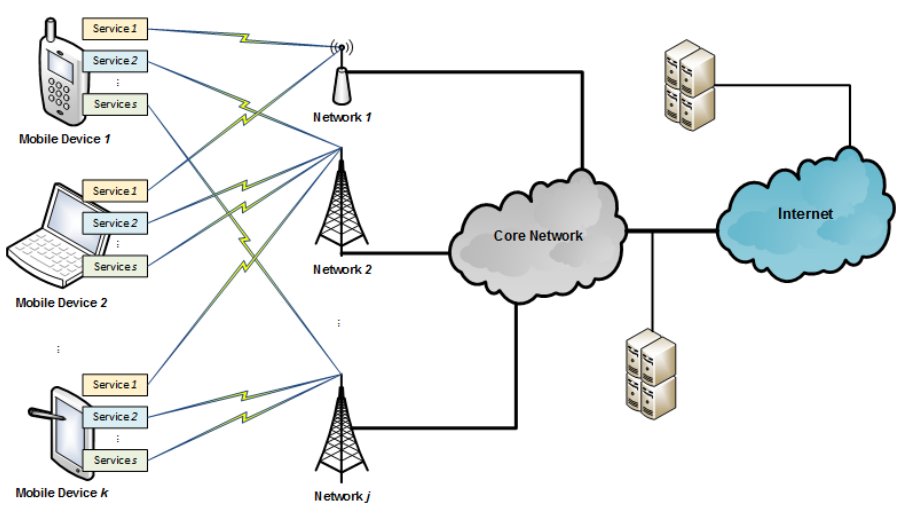

In [5]:
from IPython.display import Image
Image(filename='./MultihomingCellularNet.png',width=500, height=500)

## <font color=blue><b> MODEL TO IMPLEMENT</b></font> ##

#### <font color=blue><b> PARAMETERS:</b></font> ####
$N$ Set of access networks
<br /> <br />
$M$ set of mobile devices
<br /> <br />
$S$ set of services
<br /> <br />

##### Parameters related to services:
<br />
$D_s$ Typical demand of each service
<br /> <br />
$B_s$ BW needed for each service
<br /> <br />
$C_s$ Cost of each service

##### Parameters related to mobile devices:
<br />
$PW_{m,n}$ Power consumption of each device $m$ when connected to each network $n$
<br /> <br />
$SI_{m,n}$ Signal Information: perceived signal of each kind of access network $n$ by mobile devices $m$
<br /> <br />
$MC_m$ Maximum cost incurred by the user in the contract of mobile device $m$
<br /> <br />
$R_m$ Set of services of mobile device $m$
<br /> <br />
$BT_m$ Current remaining battery of each mobile device $m$
<br /> <br />
$SS$ Minimum signal strength required by any mobile device to connect to any network
<br /> <br />

#### <font color=blue><b> VARIABLES:</b></font> ####

$y_{mn}$=$\left\{
            \begin{array}{ll}
              1, & \hbox{if mobile device $m$ connects to network $n$} \\
              0, & \hbox{otherwise.}
            \end{array}
          \right.$
<br /> <br />  
$x_{mn}^s$=$\left\{
            \begin{array}{ll}
              1, & \hbox{if mobile device $m$ connects to network $n$ to satisfy service $s$} \\
              0, & \hbox{otherwise.}
            \end{array}
          \right.$
<br /> <br />
$\alpha$ Maximum load of the networks
<br /> <br />
$\beta$ Maximum connection cost to the networks
<br /> <br />
$\gamma$ Maximum battery consumption
<br /> <br />

#### <font color=blue><b> MODEL:</b></font> ####

\begin{alignat*}{}
&\mbox{minimize }  \quad \quad \quad \alpha&& \\
&\mbox{minimize }  \quad \quad \quad \beta&& \\
&\mbox{minimize } \quad \quad \quad \gamma&& \\
&\\
&\textbf{subject to:} &\nonumber\\[8pt]
&\textbf{(1)}\small{\mbox{ Determine if a mobile device connects to a network to satisfy the demand of its services, or not}}&&\nonumber\\
&\qquad y_{mn} \leq \sum_{\forall s\in S | s\in R_m}x_{mn}^s \qquad\qquad\forall m\in M,\ \forall n\in N\quad\nonumber\\
&\\
&\textbf{(2)}\small{\mbox{ For connecting to a network, first the device
 has to be connected to the network}}&&\nonumber\\
&\qquad x_{mn}^s \leq y_{mn}\qquad\qquad\forall m\in M,\ \forall n\in N,\ \forall s\in S\quad&\nonumber\\
&\\
&\textbf{(3)}\small{\mbox{ Guarantee the accessibility of the services in every mobile device to one network}}&&\nonumber\\
&\qquad \sum_{\forall n\in N}x_{mn}^s = 1 \qquad\qquad\forall m\in M,\ \forall s\in S| s\in R_m\quad\nonumber\\
&\\
&\textbf{(4)}\small{\mbox{ Guarantee that the services being used can only be provided by networks with enough bandwidth}}\nonumber\\
&\small{\mbox{ to meet its demand, not overloading any network}}\nonumber\\
&\qquad D_s\cdot x_{mn}^s \leq B_s\qquad\qquad\forall m\in M,\ \forall n\in N,\ \forall s\in S| s\in R_m\nonumber\\
&\\
&\textbf{(5)}\small{\mbox{ Guarantee that the connection cost to a network does not exceed the maximum connection
cost}}\nonumber\\
&\qquad C_s\cdot y_{mn} \leq MC_m\qquad\qquad\forall m\in M,\ \forall n\in N\nonumber\\
&\\
&\textbf{(6)}\small{\mbox{ Ensure that the consumption indicator generated by the connection to a network
 does not exceed the battery level of a mobile device}}\nonumber\\
&\qquad PW_{m,n}\cdot y_{mn} \leq BT_m\qquad\qquad\forall m\in M,\ \forall n\in N\nonumber\\
 &\\
 &\textbf{(7)}\small{\mbox{ Guarantee the connection of a mobile device to a reachable network (with enough signal strength)
}}\nonumber\\
&\qquad SS\cdot y_{mn} \leq SI_m\qquad\qquad\forall m\in M,\ \forall n\in N\nonumber\\
 &\\
 &\textbf{(8)}\small{\mbox{ Calculate the maximum load of the available networks}}\nonumber\\
&\qquad \sum_{\forall s\in S | s\in R_m}\sum_{\forall m\in M} \frac{D_s\cdot x_{m,n}^s}{B_s}\leq \alpha \qquad\qquad\forall n\in N\nonumber\\
 &\\
&\textbf{(9)}\ \small{\mbox{ Calculate the maximum connection cost to the networks}}\nonumber\\
&\qquad\sum_{\forall m\in M} C_s\cdot y_{m,n}\leq \beta\qquad\qquad\forall n\in N\nonumber\\
&\\
&\textbf{(10)}\small{\mbox{ Calculate the maximum power consumption indicator due to connection to networks
}}\nonumber\\
&\qquad\ \sum_{\forall m\in M} PW_{m,n}\cdot y_{m,n}\leq \gamma \qquad\qquad\forall n\in N \nonumber\\
&\\
&\textbf{(11)}\small{\mbox{ Variables definition}}\nonumber\\
&\qquad  x_{mn}^s,\ y_{mn}\ \mbox{binary} \qquad\qquad  \forall m\in M,\ \forall n\in N,\ \forall s\in S\nonumber\\
&\qquad  \alpha,\ \beta,\ \gamma\ \geq 0, \ \mbox{real.}\nonumber&&\\
\end{alignat*}

### <font color=blue><b> PROBLEM FORMULATION</b></font>

In [6]:
'''NETWORKS'''
# Number of access network
NumAccNets = 3  # LTE, WiFi, HSPA+

# Networks: LTE, WiFi, HSPA+ (High-Speed Packet Access)
AccessNetworks = ['LTE', 'WiFi', 'HSPA+']


'''SERVICES'''
# Services Demand (Mb/s)
NumServices = 3
Services = ['voice', 'video', 'web']
Demand = [0.1, 3, 0.5]

# Typical BW (Mb/s) for each technology (download speed)
BW = [36, 54, 15]

# Cost of connection to each acess network (monetary unit)
Cost = [80,0,40]

In [7]:
'''MOBILE USERS INFORMATION'''

# Number of mobiles in our scenario
NumMobiles = 5


# Mobile devices information: service interfaces, max cost, current of % battery of each device
MobInfo = {
    1: {'voice':1, 'video':1, 'web':0, 'maxcost':62, 'percentagebattery':85},
    2: {'voice':1, 'video':0, 'web':1, 'maxcost':44, 'percentagebattery':34},
    3: {'voice':1, 'video':1, 'web':1, 'maxcost':98, 'percentagebattery':74},
    4: {'voice':1, 'video':0, 'web':1, 'maxcost':73, 'percentagebattery':28},
    5: {'voice':1, 'video':1, 'web':1, 'maxcost':82, 'percentagebattery':50}
}


# Perceived signal of each kind of access network by mobile devices
# LTE, WiFi, HSPA+
SignalInfo = {
    1: [87,78,64],
    2: [55,68,28],
    3: [92,47,88],
    4: [0 ,85,25],
    5: [91,95,93],
}


# Minimum signal strength required by any mobile device to connect to any network
ms = 20


# Indicator of the battery percentage remaining in mobile device.
# It takes a high value (i.e., 3) if the battery % is above a
# battery-percentage upper limit ub;
# it takes a low value (i.e., 1) if the battery % is bellow a
# battery-percentage lower limit lb;
# finally, it takes a medium value (i.e., 2), if
# the battery % is between lb and ub.

Battery=[0 for m in range(NumMobiles)]
lb=10 # battery-percentage lower limit
ub=80 # battery-percentage upper limit
for m in range(NumMobiles):
    if MobInfo[m+1]['percentagebattery']<lb: Battery[m]=1
    elif MobInfo[m+1]['percentagebattery']<=ub: Battery[m]=2
    else: Battery[m]=3



# Power consumption indicator.
# To model the power consumption generated in a mobile device when connected to a network
# we use a power consumption indicator that relates the signal strength perceived by the device.
# The power consumption indicator is inversely proportional to the signal strength
# perceived; it is low (i.e., 1) if the perceived signal is above a signal upper limit us; high (i.e., 3)
# if the perceived signal is below a signal lower limit ls; and medium (i.e., 2) if it lays between ls
# and us.

PowerConsumption=[ [ 0 for n in range(NumAccNets) ] for m in range(NumMobiles) ]
ls=10 # signal lower limit
us=100 # signal upper limit
for m in range(NumMobiles):
    for n in range(NumAccNets):
        if SignalInfo[m+1][n]>us: PowerConsumption[m][n]=1
        elif SignalInfo[m+1][n]>=ls: PowerConsumption[m][n]=2
        else: PowerConsumption[m][n]=3

### <font color=blue><b> MODEL</b></font>

In [8]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.core import Var

In [61]:
######################
## CREATE THE MODEL ##
######################

model = AbstractModel()


######################
## MODEL PARAMETERS ##
######################

# Set of access networks
model.N = RangeSet(1,NumAccNets)

# Set of mobile devices
model.M = RangeSet(1,NumMobiles)

# Set of services
model.S = RangeSet(1,NumServices)


#####################
## MODEL VARIABLES ##
#####################

# y[m,n]=1 if mobile m connects to the network n, and 0 otherwise
model.y = Var(model.M, model.N, within=Binary, initialize=0)

# x[m,n,s]=1 if mobile m connects to the network n to satisfy service s, and 0 otherwise
model.x = Var(model.M, model.N, model.S, within=Binary, initialize=0)

# Maximum load of the networks
model.alpha = Var(within=NonNegativeReals, initialize=0)

# Maximum connection cost to the networks
model.beta  = Var(within=NonNegativeReals, initialize=0)

# Maximum battery consumption indicator from connections to the networks
model.gamma = Var(within=NonNegativeReals, initialize=0)


########################
## OBJECTIVE FUNCTION ##
########################

'''OBJECTIVE FUNCTION 1'''
# Minimize the maximum load of the networks
def Objective1_rule(model):
    return model.alpha
model.Objective1 = Objective(rule=Objective1_rule, sense=minimize)

'''OBJECTIVE FUNCTION 2'''
# Minimize the maximum connection cost to the networks
def Objective2_rule(model):
    return model.beta
model.Objective2 = Objective(rule=Objective2_rule, sense=minimize)

'''OBJECTIVE FUNCTION 3'''
# Minimize the maximum battery consumption of the networks
def Objective3_rule(model):
    return model.gamma
model.Objective3 = Objective(rule=Objective3_rule, sense=minimize)


alpha_max = 31.39
beta_max = 160.0
gamma_max = 80.0
w1 = 1
w2 = 0
w3 = 0
def weighted_obj(model):

    alpha_norm = model.alpha / alpha_max
    beta_norm = model.beta / beta_max
    gamma_norm = model.gamma / gamma_max
    return w1 * alpha_norm + w2 * beta_norm + w3 * gamma_norm

model.Objective4 = Objective(rule=weighted_obj, sense=minimize)

# ACTIVATE OR DEACTIVATE the objective function according the exercise

model.Objective1.deactivate()
model.Objective2.deactivate()
model.Objective3.deactivate()
model.Objective4.activate()


#################
## CONSTRAINTS ##
#################



'''CONSTRAINT 1'''
# Determine if a mobile device connects to a network to satisfy the demand of its services, or not.
def C1_rule(model,m,n):
    return model.y[m,n] <= sum(model.x[m,n,s] for s in model.S if MobInfo[m][Services[s-1]]==1)

model.C1 = Constraint(model.M, model.N,rule=C1_rule)


'''CONSTRAINT 2'''
# For connecting to a network to satisfy one of its service demand, the device
# has to be connected to the network
def C2_rule(model,m,n,s):
    return model.x[m,n,s] <= model.y[m,n]

model.C2 = Constraint(model.M, model.N, model.S, rule=C2_rule)


'''CONSTRAINT 3'''
# To guarantee the accessibility of the services in every mobile device to one network
def C3_rule(model,m,s):
    if MobInfo[m][Services[s-1]]==1:
        return sum(model.x[m,n,s] for n in model.N)==1
    else:
        return Constraint.Skip

model.C3 = Constraint(model.M, model.S,rule=C3_rule)


'''CONSTRAINT 4'''
# To guarantee that the services being used can only be provided by networks with enough
# bandwidth to meet its demand, not overloading any network.
def C4_rule(model,m,n,s):
    if MobInfo[m][Services[s-1]]==1:
        return Demand[s-1]*model.x[m,n,s] <= BW[s-1]
    else:
        return Constraint.Skip

model.C4 = Constraint(model.M, model.N, model.S, rule=C4_rule)


'''CONSTRAINT 5'''
# To guarantee that the connection cost to a network does not exceed the maximum connection
#cost established by the user of the mobile device
def C5_rule(model,m,n):
    if Cost[n-1] !=0:
        return Cost[n-1]*model.y[m,n] <= MobInfo[m]['maxcost']
    else:
        return Constraint.Skip

model.C5 = Constraint(model.M, model.N, rule=C5_rule)


'''CONSTRAINT 6'''
# To ensure that the consumption indicator generated by the connection to a network
# does not exceed the battery level of a mobile device.
def C6_rule(model,m,n):
    return PowerConsumption[m-1][n-1]*model.y[m,n] <= Battery[m-1]

model.C6 = Constraint(model.M, model.N, rule=C6_rule)


'''CONSTRAINT 7'''
# To guarantee the connection of a mobile device to a reachable network.
def C7_rule(model,m,n):
    return ms*model.y[m,n] <= SignalInfo[m][n-1]

model.C7 = Constraint(model.M, model.N, rule=C7_rule)


'''CONSTRAINT 8'''
# To calculate the maximum load of the available networks.
def C8_rule(model,n):
    return sum((Demand[s-1]/BW[s-1])*model.x[m,n,s]for m in model.M \
               for s in model.S if MobInfo[m][Services[s-1]]==1) <= model.alpha

model.C8 = Constraint(model.N, rule=C8_rule)


'''CONSTRAINT 9'''
# To calculate the maximum connection cost to the networks.
def C9_rule(model,n):
    return sum(Cost[n-1]*model.y[m,n] for m in model.M) <= model.beta

model.C9 = Constraint(model.N, rule=C9_rule)


'''CONSTRAINT 10'''
# To calculate the maximum power consumption indicator due to connection to networks.
def C10_rule(model,n):
    return sum(PowerConsumption[m-1][n-1]*model.y[m,n] for m in model.M)<= model.gamma

model.C10 = Constraint(model.N, rule=C10_rule)

#### SOLVE THE MODEL

In [62]:
# Construct the instance of the model and pass it to an (external) solver, in this case GLPK
opt = SolverFactory('glpk')
instance = model.create_instance()
results = opt.solve(instance)

#### GET THE RESULTS

In [63]:
# Basically we are interesting in alpha, beta and gamma values

print('Maximum load of the networks (\u03B1):','{:.2f}'.format(instance.alpha.value*100),'%')
print('Maximum connection cost to the networks (\u03B2):',instance.beta.value)
print('Maximum consumption indicator from connections to the networks (\u03B3):',instance.gamma.value)


Maximum load of the networks (α): 11.11 %
Maximum connection cost to the networks (β): 160.0
Maximum consumption indicator from connections to the networks (γ): 8.0


In [64]:
# Values of these metrics on each technology
print('LOAD (\u03B1)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],'{:.2f}'.format(sum((Demand[s-1]/BW[s-1])*instance.x[m,n,s].value*100 \
                                                for m in instance.M
                                                for s in instance.S if MobInfo[m][Services[s-1]]==1)),'%')

print('COST (\u03B2)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],sum(Cost[n-1]*instance.y[m,n].value for m in instance.M))


print('BATTERY CONSUMPTION (\u03B3)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],sum(PowerConsumption[m-1][n-1]*instance.y[m,n].value for m in instance.M))

LOAD (α)
   LTE 11.11 %
   WiFi 10.28 %
   HSPA+ 10.00 %
COST (β)
   LTE 160.0
   WiFi 0.0
   HSPA+ 160.0
BATTERY CONSUMPTION (γ)
   LTE 4.0
   WiFi 6.0
   HSPA+ 8.0


In [65]:
# See how mobile devices are connected to each technology for each service.
for n in instance.N:
    print('Network',AccessNetworks[n-1])
    for m in instance.M:
        if instance.y[m,n].value==1:
            print('    mobile',m,'Battery Consumption:',PowerConsumption[m-1][n-1] )
            for s in instance.S:
                if instance.x[m,n,s].value==1:
                    print('       ', Services[s-1],'service' '-->', \
                           'load:','{:.2f}'.format(Demand[s-1]/BW[s-1]*100),'%',\
                           'cost:',Cost[n-1] )

Network LTE
    mobile 3 Battery Consumption: 2
        video service--> load: 5.56 % cost: 80
    mobile 5 Battery Consumption: 2
        video service--> load: 5.56 % cost: 80
Network WiFi
    mobile 3 Battery Consumption: 2
        web service--> load: 3.33 % cost: 0
    mobile 4 Battery Consumption: 2
        web service--> load: 3.33 % cost: 0
    mobile 5 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 0
        web service--> load: 3.33 % cost: 0
Network HSPA+
    mobile 1 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 40
        video service--> load: 5.56 % cost: 40
    mobile 2 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 40
        web service--> load: 3.33 % cost: 40
    mobile 3 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 40
    mobile 4 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 40


#### PLOT THE RESULTS

In [66]:
import matplotlib.pyplot as plt

In [67]:
# Function to plot a list of points in a figure
# xAxisMax: maximum value of x axis
# yAxisMax: maximum value of y axis
def Plot(ListXPoints,ListYPoints, xAxisMax, yAxisMax):
    plt.plot(xpoints, ypoints, 'ro')
    plt.axis([0, xAxisMax, 0, yAxisMax])
    plt.show()

In [68]:
# Init lists of points
# DO NOT RE-EXECUTE this cell if you want to maintain the previous calculated points
# xpoints = []
# ypoints = []

# xpoints,ypoints

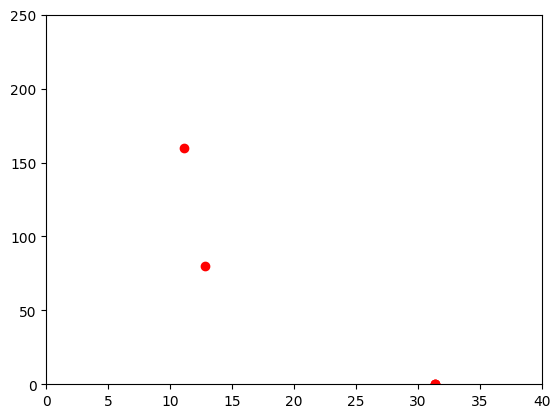

In [69]:
# Add the obtained values to the lists
# For instance, if we want to represent beta vs alpha:
xpoints.append(instance.alpha.value*100)
ypoints.append(instance.beta.value)

# Plot the resulting point
# MODIFY the maximum values of each axis accordingly
Plot(xpoints, ypoints,40,250)

In [70]:
for i in range(len(xpoints)):
    print('x: ',xpoints[i],'y: ',ypoints[i])


x:  31.3888888888889 y:  -7.105427357601e-14
x:  12.7777777777778 y:  80.0
x:  31.3888888888889 y:  -3.5527136788005e-14
x:  31.3888888888889 y:  -7.105427357601e-14
x:  11.1111111111111 y:  160.0


### <font color=blue><b>EXERCISE 1</b></font>.-
#### Compare the results running the model for each objective function separately. Decide if these points are part of the Pareto Front and explain why.

results: ([11.1111111111111, 31.3888888888889, 12.7777777777778], [160.0, 0, 80.0]).

*   Points 1, 2 and 3 form the Pareto Front since neither dominates the other, and all are Pareto optimal with respect to the other objectives.


### <font color=darkgreen><b>WEIGHTED SUM METHOD</b></font>

In Weighted Sum Method the multi-objective optimization problem is
transformed into a mono-objective optimization problem. The simplest way to
proceed is to take each objective function, associate a weight with it and then
take a weighted sum of objective functions.

In order to get comparable values, $\alpha$, $\beta$ and $\gamma$ will be normalized by the maximum values (observed in the previous executions).

-----------------------------------------------------------------------------------------------------
### <font color=blue><b>EXERCISE 2</b></font>.-
#### Write the new objective function and run the model. Plot the resulting points varying the weigths and decide what is the Pareto Front.
-----------------------------------------------------------------------------------------------------



```
#max values from ex-1
alpha_max = 31.39
beta_max = 160.0
gamma_max = 80.0
w1 = 0
w2 = 0
w3 = 1

def weighted_obj(model):
    #normalize
    alpha_norm = model.alpha / alpha_max
    beta_norm = model.beta / beta_max
    gamma_norm = model.gamma / gamma_max
    return w1 * alpha_norm + w2 * beta_norm + w3 * gamma_norm

model.Objective4 = Objective(rule=weighted_obj, sense=minimize)
```



Varying the weights, the points are always  ([11.1111111111111, 31.3888888888889, 12.7777777777778], [160.0, 0, 80.0]). So, again,
*   Points 1, 2 and 3 form the Pareto Front since neither dominates the other, and all are Pareto optimal with respect to the other objectives.

 <span style="color:orangered">$\underline{\hspace{ 6 in}}$</span>

### <font color=darkgreen><b>$\epsilon$-CONTRAINT METHOD</b></font>

This method transforms a multi-objective optimization
problem into a mono-objective optimization problem with additional constraints.
In this approach one of the objectives is minimized while the others are used
as constraints bound by some allowable levels $\epsilon_i$ .

-----------------------------------------------------------------------------------------------------

### <font color=blue><b>EXERCISE 3</b></font>.-
#### Add the objective function and the constraints for applying this method and run it for different values of epsilon. Plot all the resulting points. What values of epsilon do you need to use to obtain all the Pareto Front?
-----------------------------------------------------------------------------------------------------


In [204]:
######################
## CREATE THE MODEL ##
######################

model = AbstractModel()


######################
## MODEL PARAMETERS ##
######################

# Set of access networks
model.N = RangeSet(1, NumAccNets)

# Set of mobile devices
model.M = RangeSet(1, NumMobiles)

# Set of services
model.S = RangeSet(1, NumServices)


#####################
## MODEL VARIABLES ##
#####################

# y[m,n]=1 if mobile m connects to the network n, and 0 otherwise
model.y = Var(model.M, model.N, within=Binary, initialize=0)

# x[m,n,s]=1 if mobile m connects to the network n to satisfy service s, and 0 otherwise
model.x = Var(model.M, model.N, model.S, within=Binary, initialize=0)

# Maximum load of the networks
model.alpha = Var(within=NonNegativeReals, initialize=0)

# Maximum connection cost to the networks
model.beta = Var(within=NonNegativeReals, initialize=0)

# Maximum battery consumption indicator from connections to the networks
model.gamma = Var(within=NonNegativeReals, initialize=0)


######################
## EPSILON PARAMETERS #
######################
model.epsilon_alpha = Param(initialize=200)

model.epsilon_beta = Param(initialize=160)

model.epsilon_gamma = Param(initialize=40)

########################
## OBJECTIVE FUNCTION  ##
########################

# Minimize the maximum load of the networks
def Objective1_rule(model):
    return model.alpha
model.Objective1 = Objective(rule=Objective1_rule, sense=minimize)

def Objective2_rule(model):
    return model.beta
model.Objective2  = Objective(rule=Objective2_rule, sense=minimize)

def Objective3_rule(model):
    return model.gamma
model.Objective3 = Objective(rule=Objective3_rule, sense=minimize)

model.Objective1.deactivate()
model.Objective2.deactivate()
model.Objective3.activate()


#################
## CONSTRAINTS ##
#################

'''CONSTRAINT 1'''
# Determine if a mobile device connects to a network to satisfy the demand of its services, or not.
def C1_rule(model, m, n):
    return model.y[m, n] <= sum(model.x[m, n, s] for s in model.S if MobInfo[m][Services[s-1]] == 1)

model.C1 = Constraint(model.M, model.N, rule=C1_rule)


'''CONSTRAINT 2'''
# For connecting to a network to satisfy one of its service demand, the device
# has to be connected to the network
def C2_rule(model, m, n, s):
    return model.x[m, n, s] <= model.y[m, n]

model.C2 = Constraint(model.M, model.N, model.S, rule=C2_rule)


'''CONSTRAINT 3'''
# To guarantee the accessibility of the services in every mobile device to one network
def C3_rule(model, m, s):
    if MobInfo[m][Services[s-1]] == 1:
        return sum(model.x[m, n, s] for n in model.N) == 1
    else:
        return Constraint.Skip

model.C3 = Constraint(model.M, model.S, rule=C3_rule)


'''CONSTRAINT 4'''
# To guarantee that the services being used can only be provided by networks with enough
# bandwidth to meet its demand, not overloading any network.
def C4_rule(model, m, n, s):
    if MobInfo[m][Services[s-1]] == 1:
        return Demand[s-1]*model.x[m, n, s] <= BW[s-1]
    else:
        return Constraint.Skip

model.C4 = Constraint(model.M, model.N, model.S, rule=C4_rule)


'''CONSTRAINT 5'''
# To guarantee that the connection cost to a network does not exceed the maximum connection
#cost established by the user of the mobile device
def C5_rule(model, m, n):
    if Cost[n-1] != 0:
        return Cost[n-1]*model.y[m, n] <= MobInfo[m]['maxcost']
    else:
        return Constraint.Skip

model.C5 = Constraint(model.M, model.N, rule=C5_rule)


'''CONSTRAINT 6'''
# To ensure that the consumption indicator generated by the connection to a network
# does not exceed the battery level of a mobile device.
def C6_rule(model, m, n):
    return PowerConsumption[m-1][n-1]*model.y[m, n] <= Battery[m-1]

model.C6 = Constraint(model.M, model.N, rule=C6_rule)


'''CONSTRAINT 7'''
# To guarantee the connection of a mobile device to a reachable network.
def C7_rule(model, m, n):
    return ms*model.y[m, n] <= SignalInfo[m][n-1]

model.C7 = Constraint(model.M, model.N, rule=C7_rule)


'''CONSTRAINT 8'''
# To calculate the maximum load of the available networks.
def C8_rule(model, n):
    return sum((Demand[s-1]/BW[s-1])*model.x[m, n, s] for m in model.M \
               for s in model.S if MobInfo[m][Services[s-1]] == 1) <= model.alpha

model.C8 = Constraint(model.N, rule=C8_rule)


'''CONSTRAINT 9'''
# To calculate the maximum connection cost to the networks.
def C9_rule(model, n):
    return sum(Cost[n-1]*model.y[m, n] for m in model.M) <= model.beta

model.C9 = Constraint(model.N, rule=C9_rule)


'''CONSTRAINT 10'''
# To calculate the maximum power consumption indicator due to connection to networks.
def C10_rule(model, n):
    return sum(PowerConsumption[m-1][n-1]*model.y[m, n] for m in model.M) <= model.gamma

model.C10 = Constraint(model.N, rule=C10_rule)


def epsilon_beta_constraint_rule(model):
    return model.beta <= model.epsilon_beta

model.epsilon_beta_constraint = Constraint(rule=epsilon_beta_constraint_rule)


def epsilon_gamma_constraint_rule(model):
    return model.gamma <= model.epsilon_gamma

model.epsilon_gamma_constraint = Constraint(rule=epsilon_gamma_constraint_rule)

def epsilon_alpha_constraint_rule(model):
    return model.alpha <= model.epsilon_alpha

model.epsilon_alpha_constraint = Constraint(rule=epsilon_alpha_constraint_rule)

# Construct the instance of the model and pass it to an (external) solver, in this case GLPK
opt = SolverFactory('glpk')
instance = model.create_instance()
results = opt.solve(instance)

# Basically we are interesting in alpha, beta and gamma values

print('Maximum load of the networks (\u03B1):','{:.2f}'.format(instance.alpha.value*100),'%')
print('Maximum connection cost to the networks (\u03B2):',instance.beta.value)
print('Maximum consumption indicator from connections to the networks (\u03B3):',instance.gamma.value)


# Values of these metrics on each technology
print('LOAD (\u03B1)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],'{:.2f}'.format(sum((Demand[s-1]/BW[s-1])*instance.x[m,n,s].value*100 \
                                                for m in instance.M
                                                for s in instance.S if MobInfo[m][Services[s-1]]==1)),'%')

print('COST (\u03B2)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],sum(Cost[n-1]*instance.y[m,n].value for m in instance.M))


print('BATTERY CONSUMPTION (\u03B3)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],sum(PowerConsumption[m-1][n-1]*instance.y[m,n].value for m in instance.M))

Maximum load of the networks (α): 12.78 %
Maximum connection cost to the networks (β): 80.0
Maximum consumption indicator from connections to the networks (γ): 4.0
LOAD (α)
   LTE 9.17 %
   WiFi 9.44 %
   HSPA+ 12.78 %
COST (β)
   LTE 80.0
   WiFi 0.0
   HSPA+ 80.0
BATTERY CONSUMPTION (γ)
   LTE 2.0
   WiFi 4.0
   HSPA+ 4.0


In [205]:
# See how mobile devices are connected to each technology for each service.
for n in instance.N:
    print('Network',AccessNetworks[n-1])
    for m in instance.M:
        if instance.y[m,n].value==1:
            print('    mobile',m,'Battery Consumption:',PowerConsumption[m-1][n-1] )
            for s in instance.S:
                if instance.x[m,n,s].value==1:
                    print('       ', Services[s-1],'service' '-->', \
                           'load:','{:.2f}'.format(Demand[s-1]/BW[s-1]*100),'%',\
                           'cost:',Cost[n-1] )

Network LTE
    mobile 5 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 80
        video service--> load: 5.56 % cost: 80
        web service--> load: 3.33 % cost: 80
Network WiFi
    mobile 1 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 0
        video service--> load: 5.56 % cost: 0
    mobile 4 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 0
        web service--> load: 3.33 % cost: 0
Network HSPA+
    mobile 2 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 40
        web service--> load: 3.33 % cost: 40
    mobile 3 Battery Consumption: 2
        voice service--> load: 0.28 % cost: 40
        video service--> load: 5.56 % cost: 40
        web service--> load: 3.33 % cost: 40


In [206]:
# Function to plot a list of points in a figure
# xAxisMax: maximum value of x axis
# yAxisMax: maximum value of y axis
def Plot(ListXPoints,ListYPoints, xAxisMax, yAxisMax):
    plt.plot(xpoints, ypoints, 'ro')
    plt.axis([0, xAxisMax, 0, yAxisMax])
    plt.show()

In [207]:
# # DO NOT RE-EXECUTE this cell if you want to maintain the previous calculated points
# xpoints = []
# ypoints = []

# xpoints,ypoints

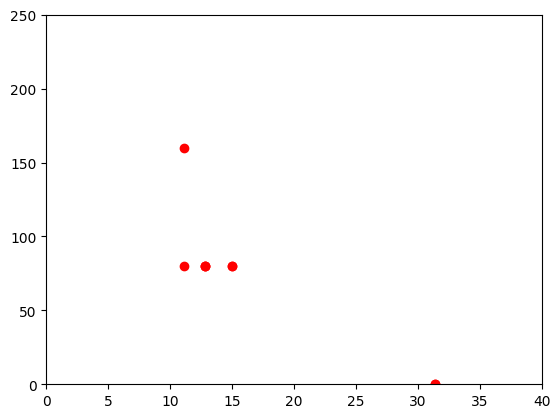

In [208]:
# Add the obtained values to the lists
# For instance, if we want to represent beta vs alpha:
xpoints.append(instance.alpha.value*100)
ypoints.append(instance.beta.value)

# Plot the resulting point
# MODIFY the maximum values of each axis accordingly
Plot(xpoints, ypoints,40,250)

In [209]:
for i in range(len(xpoints)):
    print('x: ',xpoints[i],'y: ',ypoints[i])

x:  11.1111111111111 y:  80.0
x:  31.3888888888889 y:  0.0
x:  15.0 y:  80.0
x:  15.0 y:  80.0
x:  12.7777777777778 y:  80.0
x:  12.7777777777778 y:  80.0
x:  11.1111111111111 y:  160.0
x:  31.3888888888889 y:  0.0
x:  12.7777777777778 y:  80.0


For Point 1 (Minimize Alpha):
Set epsilon_beta = 11.6, epsilon_gamma = 160, and alpha active.

For Point 2 (Minimize Beta):
Set epsilon_alpha = 40, epsilon_gamma = 80, and beta active.

For Point 3 (Minimize Gamma):
Set epsilon_alpha = 200, epsilon_beta = 160, and gamma active.

 <span style="color:orangered">$\underline{\hspace{ 6 in}}$</span>

### <font color=darkgreen><b>GOL PROGRAMMING METHOD</b></font>

This method is a technique often used in engineering design to find a compromised solution which will simultaneosly satisfy a number of design goals. This problem is reduced into a single objective of minimizing a weighted sum of deviations from goals.

-----------------------------------------------------------------------------------------------------
### <font color=blue><b>EXERCISE 4</b></font>.-
#### Formulate the problem and run it for different values of weight w. Plot all the resulting points. What are the goals in this case?
-----------------------------------------------------------------------------------------------------

In [291]:
######################
## CREATE THE MODEL ##
######################

model = AbstractModel()


######################
## MODEL PARAMETERS ##
######################

# Set of access networks
model.N = RangeSet(1, NumAccNets)

# Set of mobile devices
model.M = RangeSet(1, NumMobiles)

# Set of services
model.S = RangeSet(1, NumServices)

# Targets for each objective
model.alpha_target = Param(initialize=31.39)  # Target for alpha
model.beta_target  = Param(initialize=160.0)  # Target for beta
model.gamma_target = Param(initialize=80.0)   # Target for gamma

# Weights for the objectives
model.w1 = Param(initialize=-40)
model.w2 = Param(initialize=50)
model.w3 = Param(initialize=-40)

#####################
## MODEL VARIABLES ##
#####################

# y[m,n]=1 if mobile m connects to the network n, and 0 otherwise
model.y = Var(model.M, model.N, within=Binary, initialize=0)

# x[m,n,s]=1 if mobile m connects to the network n to satisfy service s, and 0 otherwise
model.x = Var(model.M, model.N, model.S, within=Binary, initialize=0)

# Maximum load of the networks
model.alpha = Var(within=NonNegativeReals, initialize=0)

# Maximum connection cost to the networks
model.beta  = Var(within=NonNegativeReals, initialize=0)

# Maximum battery consumption indicator from connections to the networks
model.gamma = Var(within=NonNegativeReals, initialize=0)

# Lambda variable to measure deviations from targets
model.lambda_ = Var(within=NonNegativeReals, initialize=0)


########################
## OBJECTIVE FUNCTION ##
########################

# Minimize lambda (deviation from the target values)
def goal_attainment_obj_rule(model):
    return model.lambda_

model.goal_attainment_obj = Objective(rule=goal_attainment_obj_rule, sense=minimize)


#################
## CONSTRAINTS ##
#################

'''CONSTRAINT 1'''
# Determine if a mobile device connects to a network to satisfy the demand of its services, or not.
def C1_rule(model,m,n):
    return model.y[m,n] <= sum(model.x[m,n,s] for s in model.S if MobInfo[m][Services[s-1]] == 1)

model.C1 = Constraint(model.M, model.N,rule=C1_rule)

'''CONSTRAINT 2'''
# For connecting to a network to satisfy one of its service demand, the device has to be connected to the network
def C2_rule(model,m,n,s):
    return model.x[m,n,s] <= model.y[m,n]

model.C2 = Constraint(model.M, model.N, model.S, rule=C2_rule)

'''CONSTRAINT 3'''
# Guarantee the accessibility of the services in every mobile device to one network
def C3_rule(model,m,s):
    if MobInfo[m][Services[s-1]] == 1:
        return sum(model.x[m,n,s] for n in model.N) == 1
    else:
        return Constraint.Skip

model.C3 = Constraint(model.M, model.S,rule=C3_rule)

'''CONSTRAINT 4'''
# Services being used can only be provided by networks with enough bandwidth
def C4_rule(model,m,n,s):
    if MobInfo[m][Services[s-1]] == 1:
        return Demand[s-1] * model.x[m,n,s] <= BW[s-1]
    else:
        return Constraint.Skip

model.C4 = Constraint(model.M, model.N, model.S, rule=C4_rule)

'''CONSTRAINT 5'''
# The connection cost to a network should not exceed the max connection cost
def C5_rule(model,m,n):
    if Cost[n-1] != 0:
        return Cost[n-1]*model.y[m,n] <= MobInfo[m]['maxcost']
    else:
        return Constraint.Skip

model.C5 = Constraint(model.M, model.N, rule=C5_rule)

'''CONSTRAINT 6'''
# The consumption indicator for connecting to a network must not exceed the battery level
def C6_rule(model,m,n):
    return PowerConsumption[m-1][n-1] * model.y[m,n] <= Battery[m-1]

model.C6 = Constraint(model.M, model.N, rule=C6_rule)

'''CONSTRAINT 7'''
# Guarantee the connection of a mobile device to a reachable network
def C7_rule(model,m,n):
    return ms * model.y[m,n] <= SignalInfo[m][n-1]

model.C7 = Constraint(model.M, model.N, rule=C7_rule)

'''CONSTRAINT 8'''
# Calculate the maximum load of the available networks
def C8_rule(model,n):
    return sum((Demand[s-1] / BW[s-1]) * model.x[m,n,s] for m in model.M for s in model.S if MobInfo[m][Services[s-1]] == 1) <= model.alpha

model.C8 = Constraint(model.N, rule=C8_rule)

'''CONSTRAINT 9'''
# Calculate the maximum connection cost to the networks
def C9_rule(model,n):
    return sum(Cost[n-1] * model.y[m,n] for m in model.M) <= model.beta

model.C9 = Constraint(model.N, rule=C9_rule)

'''CONSTRAINT 10'''
# Calculate the maximum power consumption indicator due to connection to networks
def C10_rule(model,n):
    return sum(PowerConsumption[m-1][n-1] * model.y[m,n] for m in model.M)<= model.gamma

model.C10 = Constraint(model.N, rule=C10_rule)


#####################
## GOAL ATTAINMENT CONSTRAINTS ##
#####################

# Constraints to limit deviation based on lambda

'''Lambda constraint for alpha'''
def lambda_alpha_constraint(model):
    return (model.alpha - model.alpha_target) <= model.lambda_ * model.w1 * model.alpha_target

model.lambda_alpha = Constraint(rule=lambda_alpha_constraint)

'''Lambda constraint for beta'''
def lambda_beta_constraint(model):
    return (model.beta - model.beta_target) <= model.lambda_ * model.w2 * model.beta_target

model.lambda_beta = Constraint(rule=lambda_beta_constraint)

'''Lambda constraint for gamma'''
def lambda_gamma_constraint(model):
    return (model.gamma - model.gamma_target) <= model.lambda_ * model.w3 * model.gamma_target

model.lambda_gamma = Constraint(rule=lambda_gamma_constraint)


In [292]:
# Construct the instance of the model and pass it to an (external) solver, in this case GLPK
opt = SolverFactory('glpk')
instance = model.create_instance()
results = opt.solve(instance)

# Basically we are interesting in alpha, beta and gamma values

print('Maximum load of the networks (\u03B1):','{:.2f}'.format(instance.alpha.value*100),'%')
print('Maximum connection cost to the networks (\u03B2):',instance.beta.value)
print('Maximum consumption indicator from connections to the networks (\u03B3):',instance.gamma.value)


# Values of these metrics on each technology
print('LOAD (\u03B1)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],'{:.2f}'.format(sum((Demand[s-1]/BW[s-1])*instance.x[m,n,s].value*100 \
                                                for m in instance.M
                                                for s in instance.S if MobInfo[m][Services[s-1]]==1)),'%')

print('COST (\u03B2)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],sum(Cost[n-1]*instance.y[m,n].value for m in instance.M))


print('BATTERY CONSUMPTION (\u03B3)')
for n in range(1,NumAccNets+1):
    print('  ',AccessNetworks[n-1],sum(PowerConsumption[m-1][n-1]*instance.y[m,n].value for m in instance.M))

Maximum load of the networks (α): 31.39 %
Maximum connection cost to the networks (β): 0.0
Maximum consumption indicator from connections to the networks (γ): 10.0
LOAD (α)
   LTE 0.00 %
   WiFi 31.39 %
   HSPA+ 0.00 %
COST (β)
   LTE 0.0
   WiFi 0.0
   HSPA+ 0.0
BATTERY CONSUMPTION (γ)
   LTE 0.0
   WiFi 10.0
   HSPA+ 0.0


In [293]:
def Plot(ListXPoints,ListYPoints, xAxisMax, yAxisMax):
    plt.plot(xpoints, ypoints, 'ro')
    plt.axis([0, xAxisMax, 0, yAxisMax])
    plt.show()

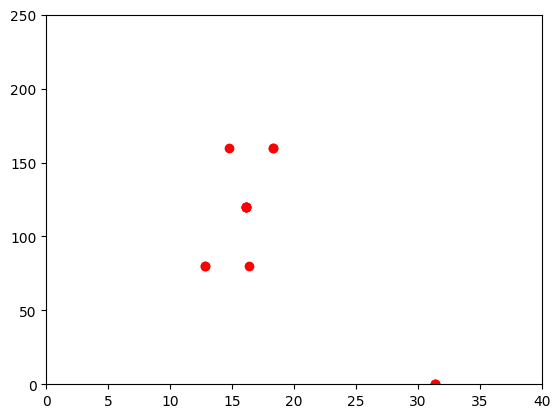

In [294]:
# xpoints = []
# ypoints = []

xpoints.append(instance.alpha.value*100)
ypoints.append(instance.beta.value)

# Plot the resulting point
# MODIFY the maximum values of each axis accordingly
Plot(xpoints, ypoints,40,250)

In [295]:
for i in range(len(xpoints)):
    print('x: ',xpoints[i],'y: ',ypoints[i])

x:  12.7777777777778 y:  80.0
x:  16.1111111111111 y:  120.0
x:  16.1111111111111 y:  120.0
x:  31.3888888888889 y:  0.0
x:  16.3888888888889 y:  80.0
x:  18.3333333333333 y:  160.0
x:  16.1111111111111 y:  120.0
x:  18.3333333333333 y:  160.0
x:  14.7222222222222 y:  160.0
x:  31.3888888888889 y:  0.0
x:  16.1111111111111 y:  120.0
x:  16.1111111111111 y:  120.0
x:  12.7777777777778 y:  80.0
x:  31.3888888888889 y:  0.0


In this case, the goals refer to the desired target values for the three key metrics of the problem:

    Maximum load of the networks (α): The goal is to minimize the load across the networks, with a specific target (goal) value for α. The goal in this case is set to 200.

    Maximum connection cost to the networks (β): The goal is to minimize the cost associated with network connections. The target value (goal) for β is 160.

    Maximum battery consumption indicator from connections to the networks (γ): The goal is to minimize the battery consumption due to connections. The goal for γ is 40.

These goals are defined as parameters in the model:

    model.alpha_goal = 200
    model.beta_goal = 160
    model.gamma_goal = 40

The goal attainment method works by minimizing the weighted sum of deviations from these target values.